White Wine Quality by Fatih Kurt
========================================================

> **Tip**: You will see quoted sections like this throughout the template to
help you construct your report. Make sure that you remove these notes before
you finish and submit your project!

> **Tip**: One of the requirements of this project is that your code follows
good formatting techniques, including limiting your lines to 80 characters or
less. If you're using RStudio, go into Preferences \> Code \> Display to set up
a margin line to help you keep track of this guideline!

In [1]:
# Load all of the packages that you end up using in your analysis in this code
# chunk.

# Notice that the parameter "echo" was set to FALSE for this code chunk. This
# prevents the code from displaying in the knitted HTML output. You should set
# echo=FALSE for all code chunks in your file, unless it makes sense for your
# report to show the code that generated a particular plot.

# The other parameters for "message" and "warning" should also be set to FALSE
# for other code chunks once you have verified that each plot comes out as you
# want it to. This will clean up the flow of your report.
library(ggplot2)
library(repr) # resize plot
library(gridExtra) # grid for plots
library(GGally) # ggpairs - multivariate summary

In [2]:
# Load the Data
ww <- read.csv("wineQualityWhites.csv")
ww$X <- NULL

This report expores a dataset containing quality and various other attributes of approximately 5k white wine samples. 

## Description of attributes:

1. **fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. **volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines

4. **residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. **chlorides:** the amount of salt in the wine

6. **free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. **total sulfur dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. **density:** the density of water is close to that of water depending on the percent alcohol and sugar content

9. **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10. **sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11. **alcohol:** the percent alcohol content of the wine

    Output variable (based on sensory data): 
12. **quality** (score between 0 and 10)

Extended data set description is provided [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/wineQualityInfo.txt).

> **Tip**: Before you create any plots, it is a good idea to provide a short
introduction into the dataset that you are planning to explore. Replace this
quoted text with that general information!

# Univariate Plots Section

> **Tip**: In this section, you should perform some preliminary exploration of
your dataset. Run some summaries of the data and create univariate plots to
understand the structure of the individual variables in your dataset. Don't
forget to add a comment after each plot or closely-related group of plots!
There should be multiple code chunks and text sections; the first one below is
just to help you get started.

In [3]:
dim(ww)

[1] 4898   12

In [4]:
str(ww)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


In [5]:
summary(ww)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

Our data set consists of 4898 entries each with 12 variables / columns. 

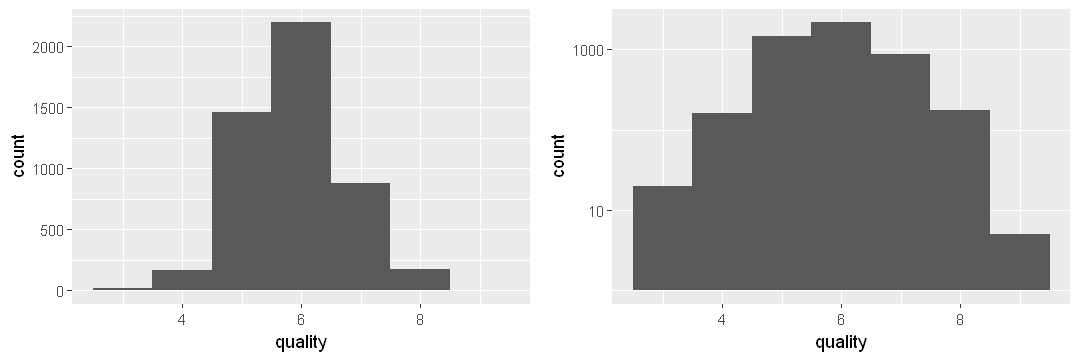

In [6]:
options(repr.plot.width=8, repr.plot.height=3)
g1 <- ggplot(aes(x=quality), data=ww) + geom_histogram(binwidth=1, bins=10)
g2 <- ggplot(aes(x=quality), data=ww) + geom_histogram(binwidth=1, bins=10)+ scale_y_log10()
grid.arrange(g1,g2,ncol=2)

> Graphs above show that with majority being around quality 5-7, only few wines are of quality 9 or 3. Second graph shows distribution in a vertical logarithmic scale.

Let's all also look into distribution of other variables with respect to quality. 

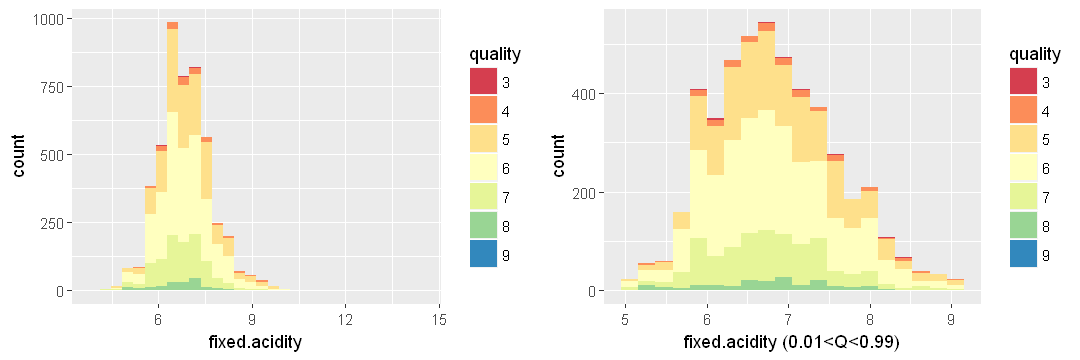

In [7]:
g1 <- ggplot(aes(x=fixed.acidity,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=fixed.acidity,fill=factor(quality)), data=subset(ww,
        fixed.acidity<quantile(ww$fixed.acidity,0.99) & 
            fixed.acidity>quantile(ww$fixed.acidity,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "fixed.acidity (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be no substantial difference in distribution of different qualities.

Below are summary of the variable **fixed.acidity**.

In [8]:
summary(ww$fixed.acidity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.800   6.300   6.800   6.855   7.300  14.200 

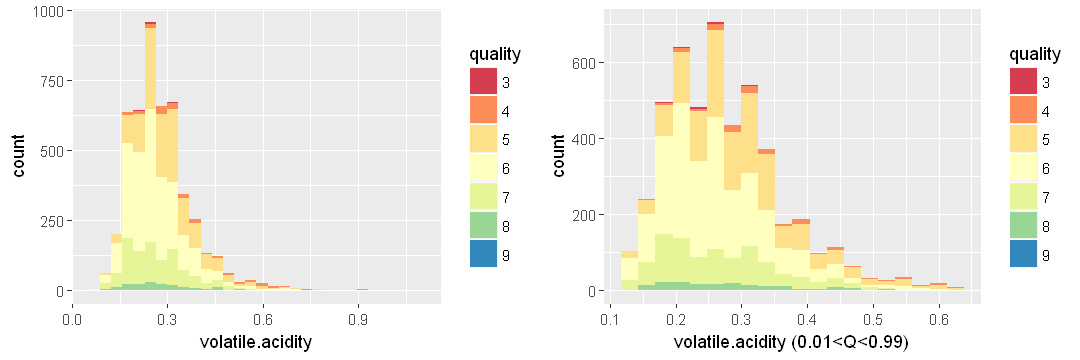

In [9]:
g1 <- ggplot(aes(x=volatile.acidity,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=volatile.acidity,fill=factor(quality)), data=subset(ww,
        volatile.acidity<quantile(ww$volatile.acidity,0.99) & 
            volatile.acidity>quantile(ww$volatile.acidity,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "volatile.acidity (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal with a little skewness towards right. There seems to be a hint to a difference in distribution of different qualities. Higher quality wines might have lower acidity.  We will look into **volatile.acidity** to see if it effects the quality.

Below are summary of the variable **volatile.acidity**.

In [10]:
summary(ww$volatile.acidity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0800  0.2100  0.2600  0.2782  0.3200  1.1000 

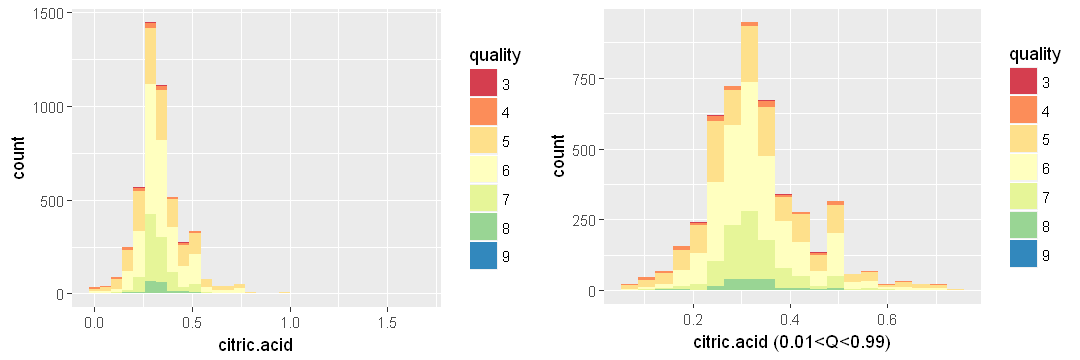

In [11]:
g1 <- ggplot(aes(x=citric.acid,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=citric.acid,fill=factor(quality)), data=subset(ww,
        citric.acid<quantile(ww$citric.acid,0.99) & 
            citric.acid>quantile(ww$citric.acid,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "citric.acid (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be no substantial difference in distribution of different qualities.

Below are summary of the variable **citric.acid**.

In [12]:
summary(ww$citric.acid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2700  0.3200  0.3342  0.3900  1.6600 

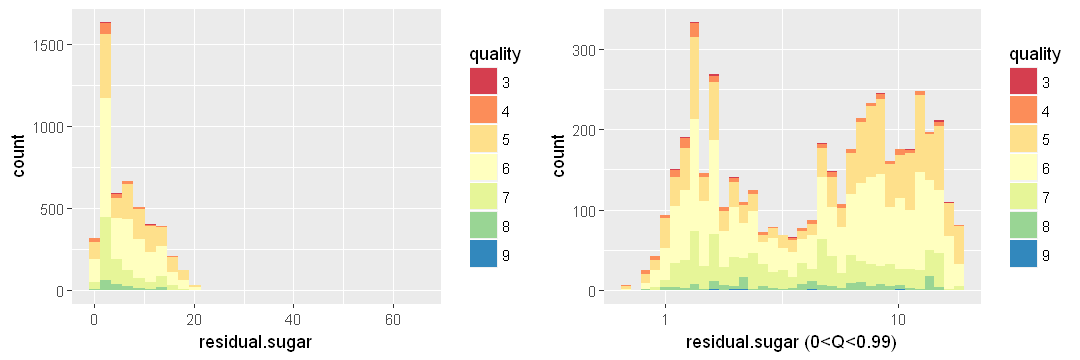

In [13]:
g1 <- ggplot(aes(x=residual.sugar,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=residual.sugar,fill=factor(quality)), data=subset(ww,
        residual.sugar<quantile(ww$residual.sugar,0.99) & 
            residual.sugar>quantile(ww$residual.sugar,0.0))) + 
    geom_histogram(bins=35) + scale_fill_brewer(palette="Spectral") +
    scale_x_log10() +
    labs(x = "residual.sugar (0<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is skew towards right. But when plotted in logarithmic scale the distribution seems to be bimodal. However, there seems to be no substantial difference in distribution of different qualities.

Below are summary of the variable **residual.sugar**.

In [14]:
summary(ww$residual.sugar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.700   5.200   6.391   9.900  65.800 

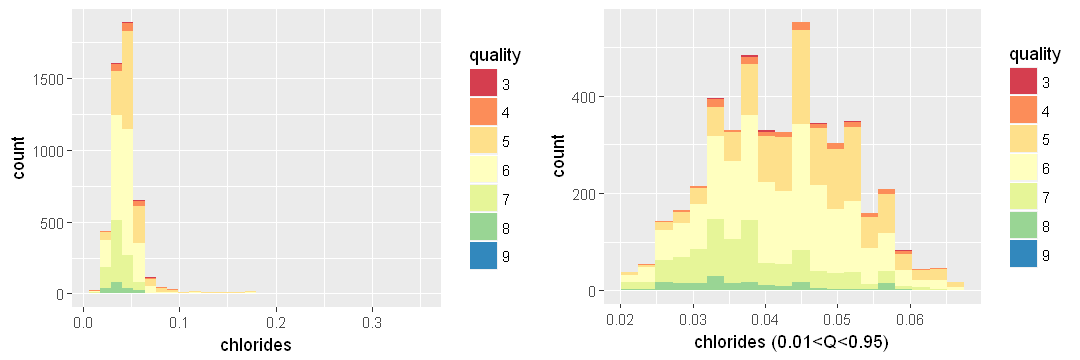

In [15]:
g1 <- ggplot(aes(x=chlorides,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=chlorides,fill=factor(quality)), data=subset(ww,
        chlorides<quantile(ww$chlorides,0.95) & 
            chlorides>quantile(ww$chlorides,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "chlorides (0.01<Q<0.95)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be a difference in distribution of different qualities. Higher quality wines might have lower levels of chlorides.  We will look into **chlorides** to see if it effects the quality.

Below are summary of the variable **chlorides**.

In [16]:
summary(ww$chlorides)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00900 0.03600 0.04300 0.04577 0.05000 0.34600 

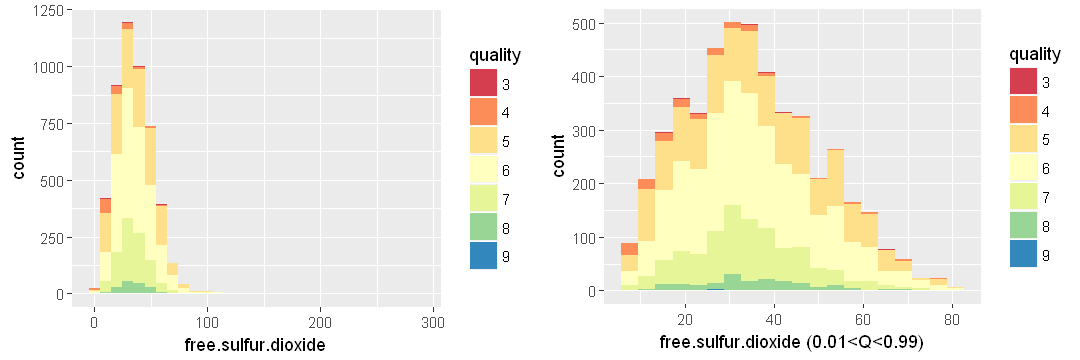

In [17]:
g1 <- ggplot(aes(x=free.sulfur.dioxide,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=free.sulfur.dioxide,fill=factor(quality)), data=subset(ww,
        free.sulfur.dioxide<quantile(ww$free.sulfur.dioxide,0.99) & 
            free.sulfur.dioxide>quantile(ww$free.sulfur.dioxide,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "free.sulfur.dioxide (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be no substantial difference in distribution of different qualities.

Below are summary of the variable **free.sulfur.dioxide**.

In [18]:
summary(ww$free.sulfur.dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   23.00   34.00   35.31   46.00  289.00 

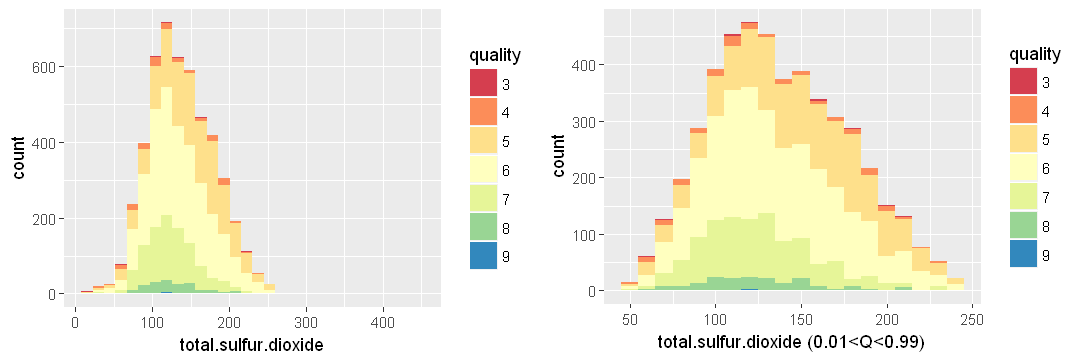

In [19]:
g1 <- ggplot(aes(x=total.sulfur.dioxide,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=total.sulfur.dioxide,fill=factor(quality)), data=subset(ww,
        total.sulfur.dioxide<quantile(ww$total.sulfur.dioxide,0.99) & 
            total.sulfur.dioxide>quantile(ww$total.sulfur.dioxide,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "total.sulfur.dioxide (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be a difference in distribution of different qualities. Higher quality wines might have lower levels of total.sulfur.dioxide.  We will look into **total.sulfur.dioxide** to see if it effects the quality.

Below are summary of the variable **total.sulfur.dioxide**.

In [20]:
summary(ww$total.sulfur.dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0   108.0   134.0   138.4   167.0   440.0 

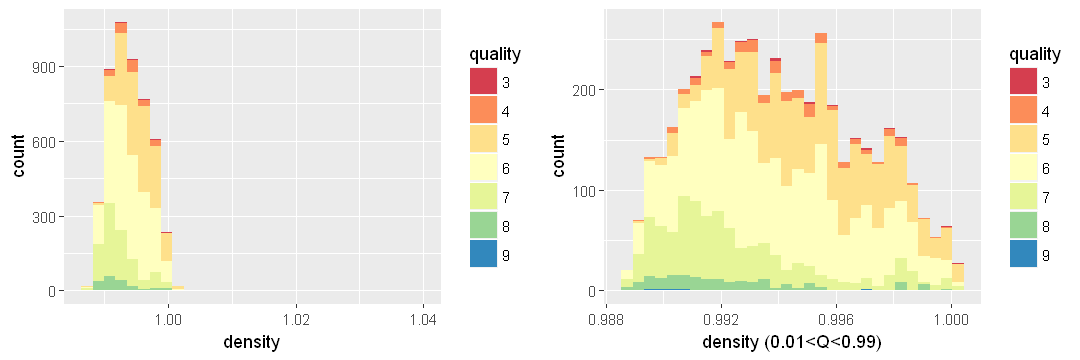

In [21]:
g1 <- ggplot(aes(x=density,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=density,fill=factor(quality)), data=subset(ww,
        density<quantile(ww$density,0.99) & 
            density>quantile(ww$density,0.01))) + 
    geom_histogram(bins=30) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "density (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be a substantial difference in distribution of different qualities. Higher quality wines seems to have lower density.  **density** is very good candidate to check it effects on quality.

Below are summary of the variable **density**.

In [22]:
summary(ww$density)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9917  0.9937  0.9940  0.9961  1.0390 

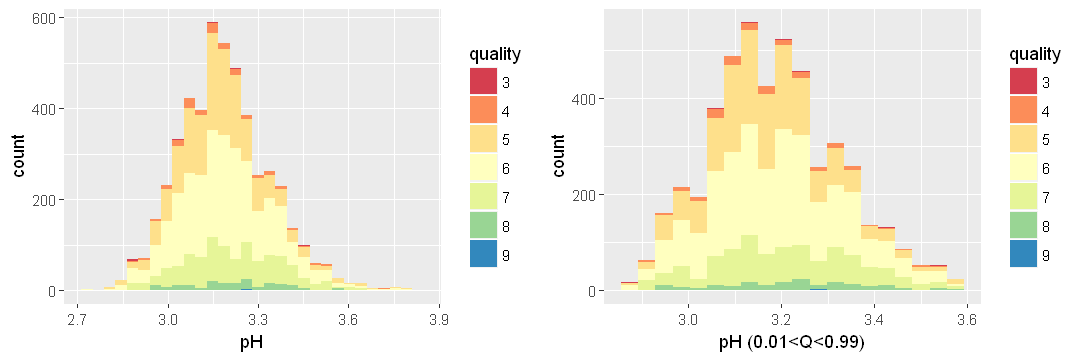

In [23]:
g1 <- ggplot(aes(x=pH,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=pH,fill=factor(quality)), data=subset(ww,
        pH<quantile(ww$pH,0.99) & 
            pH>quantile(ww$pH,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "pH (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be no substantial difference in distribution of different qualities.

Below are summary of the variable **pH**.

In [24]:
summary(ww$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.720   3.090   3.180   3.188   3.280   3.820 

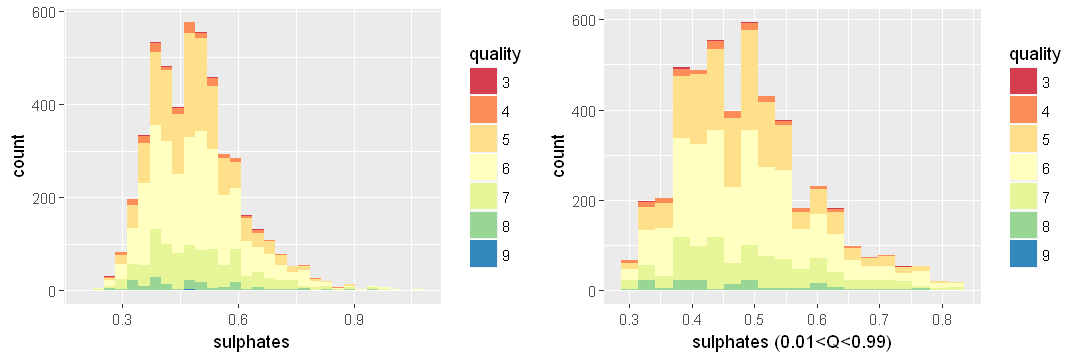

In [25]:
g1 <- ggplot(aes(x=sulphates,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=sulphates,fill=factor(quality)), data=subset(ww,
        sulphates<quantile(ww$sulphates,0.99) & 
            sulphates>quantile(ww$sulphates,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "sulphates (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be no substantial difference in distribution of different qualities.

Below are summary of the variable **sulphates**.

In [26]:
summary(ww$sulphates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2200  0.4100  0.4700  0.4898  0.5500  1.0800 

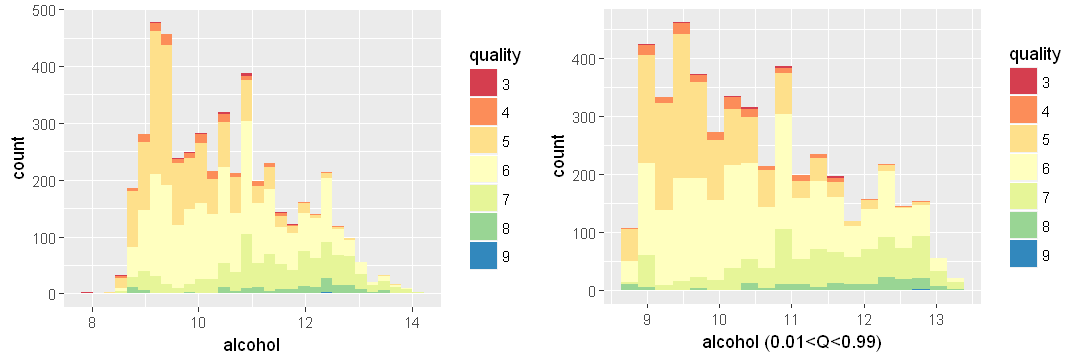

In [27]:
g1 <- ggplot(aes(x=alcohol,fill=factor(quality)), data=ww) + geom_histogram(bins=30) + 
    scale_fill_brewer(palette="Spectral") +
    labs(fill="quality")
g2 <- ggplot(aes(x=alcohol,fill=factor(quality)), data=subset(ww,
        alcohol<quantile(ww$alcohol,0.99) & 
            alcohol>quantile(ww$alcohol,0.01))) + 
    geom_histogram(bins=20) + scale_fill_brewer(palette="Spectral") + 
    labs(x = "alcohol (0.01<Q<0.99)", fill="quality")
grid.arrange(g1,g2,ncol=2)

> Distribution is normal. There seems to be a substantial difference in distribution of different qualities. Higher quality wines seems to have higher levels of alcohol.  **alcohol** is also a very good candidate to check it effects on quality.

Below are summary of the variable **alcohol**.

In [28]:
summary(ww$alcohol)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00    9.50   10.40   10.51   11.40   14.20 

> **Tip**: Make sure that you leave a blank line between the start / end of
each code block and the end / start of your Markdown text so that it is
formatted nicely in the knitted text. Note as well that text on consecutive
lines is treated as a single space. Make sure you have a blank line between
your paragraphs so that they too are formatted for easy readability.

# Univariate Analysis

> **Tip**: Now that you've completed your univariate explorations, it's time to
reflect on and summarize what you've found. Use the questions below to help you
gather your observations and add your own if you have other thoughts!

### What is the structure of your dataset?

> Data set consists of around 5k observations. Each observation has values for 12 different variables. In addition to this variables, each has a quality rating. 

### What is/are the main feature(s) of interest in your dataset?
> Variables **density** and **alcohol** seem to be showing promising effects on quality of wine. Both seem to be showing substantial differences in distribution of quality.  

### What other features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Variables **volatile.acidity**, **chlorides**, and **total.sulfur.dioxide** also hints at difference in distribution of quality. We will also look into measure their contributin into quality.


### Did you create any new variables from existing variables in the dataset?

> No. The most obvious candidate seems to be quality. However, I think leacing quality as is seems to be OK, since there is few different values reported. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Variable **residual.sugar** have a skew distribution towards right. I plotted data in logarithmic scale to see if there is anything to note. The new plot was bimodal. The other variables mostly seem to be having normal distribution. 

> For most variables, I removed outliers by setting varying degrees of quantiles between 0.01-0.05 / 0.95-0.99. This helped me to see the important data more clearly. I also plotted **residual.sugar** in logarithmic scale. 

> I also changes number of bins in order to view distribution better.

# Bivariate Plots Section

> **Tip**: Based on what you saw in the univariate plots, what relationships
between variables might be interesting to look at in this section? Don't limit
yourself to relationships between a main output feature and one of the
supporting variables. Try to look at relationships between supporting variables
as well.

## Primary Variables
> 1. **density**
> 2. **alcohol**

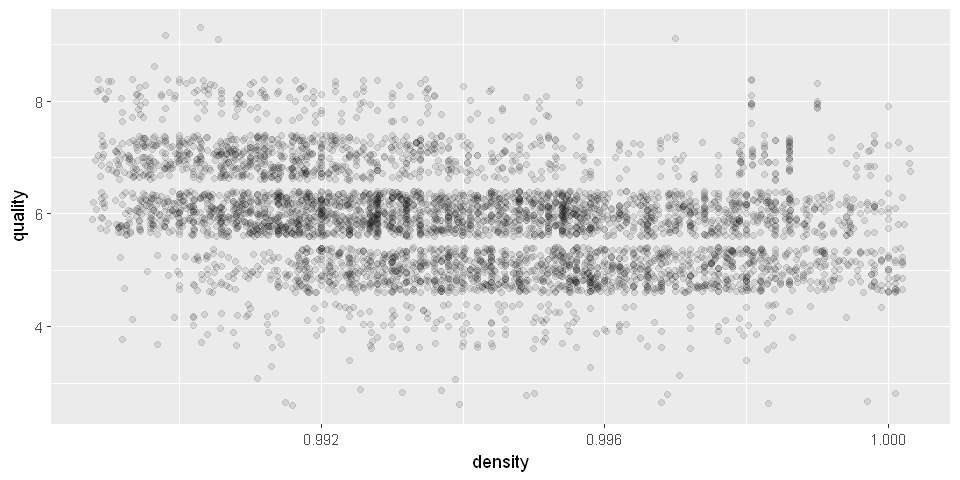

In [173]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(x=density, y=quality), data=subset(ww,
        density<quantile(ww$density,0.99) & 
            density>quantile(ww$density,0.01))) + geom_jitter(alpha=1/10)

> With a little jitter for quality, which is a discrete value, it seems there is a negative correlation between density and quality.

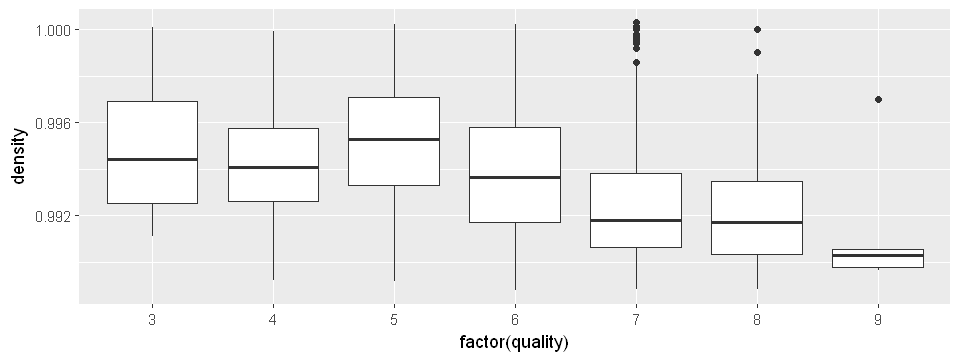

In [174]:
options(repr.plot.width=8, repr.plot.height=3)
qplot(y=density,x=factor(quality),
      data=subset(ww,
        density<quantile(ww$density,0.99) & 
            density>quantile(ww$density,0.01)), geom="boxplot")

> Boxplot shows this relation better, with distributions for quality.

Below you can also find numerical values for these box plots:

In [31]:
by(ww$density,ww$quality,summary)

ww$quality: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9911  0.9925  0.9944  0.9949  0.9969  1.0001 
------------------------------------------------------------ 
ww$quality: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9892  0.9926  0.9941  0.9943  0.9958  1.0004 
------------------------------------------------------------ 
ww$quality: 5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9872  0.9933  0.9953  0.9953  0.9972  1.0024 
------------------------------------------------------------ 
ww$quality: 6
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9876  0.9917  0.9937  0.9940  0.9959  1.0390 
------------------------------------------------------------ 
ww$quality: 7
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9906  0.9918  0.9925  0.9937  1.0004 
------------------------------------------------------------ 
ww$quality: 8
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9903  0.9916  0.9922  0.9935  1.0006 
------------------

In [32]:
with(subset(ww,
        density<quantile(ww$density,0.99) & 
            density>quantile(ww$density,0.01)),
     cor.test(density,quality))


	Pearson's product-moment correlation

data:  density and quality
t = -22.926, df = 4798, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3394837 -0.2884840
sample estimates:
       cor 
-0.3142105 


> **Correlation test shows that there is a correlation between _[-0.34, -0.29]_ for these variables in a confidence level of 95%.**

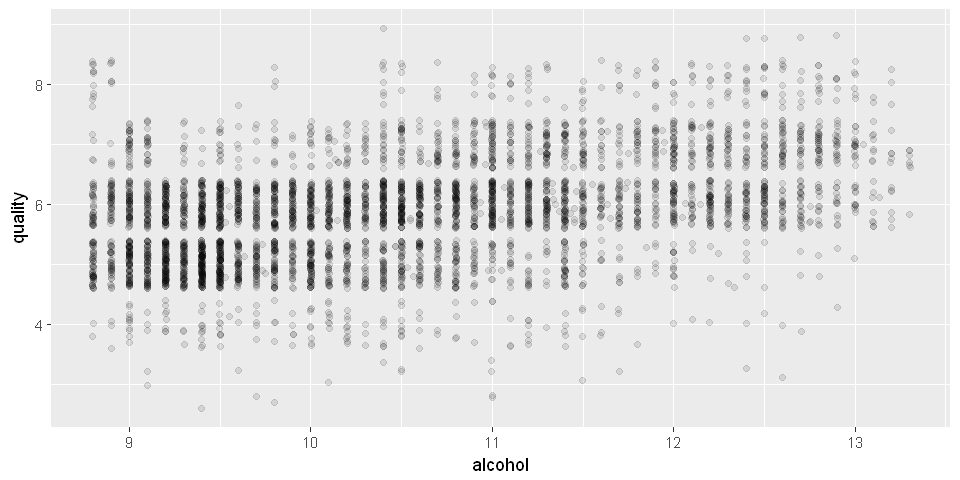

In [175]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(x=alcohol, y=quality), data=subset(ww,
        alcohol<quantile(ww$alcohol,0.99) & 
            alcohol>quantile(ww$alcohol,0.01))) + geom_jitter(alpha=1/10)

> With a little jitter for quality, which is a discrete value, it seems there is a positive correlation between density and quality.

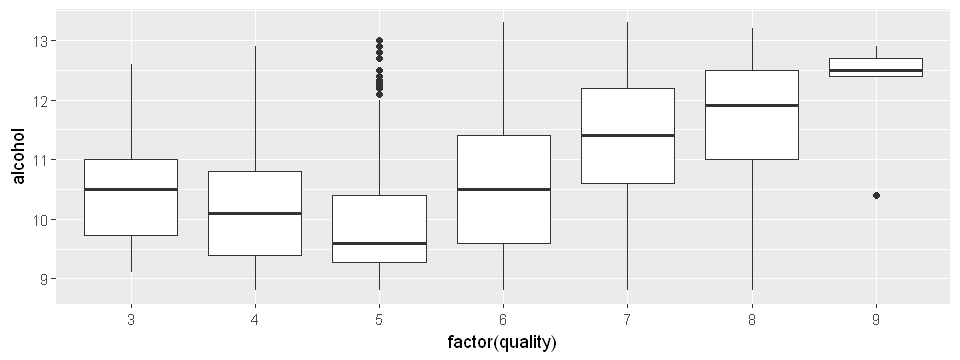

In [176]:
options(repr.plot.width=8, repr.plot.height=3)
qplot(y=alcohol,x=factor(quality),
      data=subset(ww,
        alcohol<quantile(ww$alcohol,0.99) & 
            alcohol>quantile(ww$alcohol,0.01)), geom="boxplot")

> Boxplot shows this relation better, with distributions for quality.

Below you can also find numerical values for these box plots:

In [35]:
by(ww$alcohol,ww$quality,summary)

ww$quality: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00    9.55   10.45   10.35   11.00   12.60 
------------------------------------------------------------ 
ww$quality: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.40    9.40   10.10   10.15   10.75   13.50 
------------------------------------------------------------ 
ww$quality: 5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.000   9.200   9.500   9.809  10.300  13.600 
------------------------------------------------------------ 
ww$quality: 6
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.50    9.60   10.50   10.58   11.40   14.00 
------------------------------------------------------------ 
ww$quality: 7
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.60   10.60   11.40   11.37   12.30   14.20 
------------------------------------------------------------ 
ww$quality: 8
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.50   11.00   12.00   11.64   12.60   14.00 
------------------

In [36]:
with(subset(ww,
        alcohol<quantile(ww$alcohol,0.99) & 
            alcohol>quantile(ww$alcohol,0.01)),
     cor.test(alcohol,quality))


	Pearson's product-moment correlation

data:  alcohol and quality
t = 32.392, df = 4720, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4028330 0.4495123
sample estimates:
      cor 
0.4264566 


> **Correlation test shows that there is a correlation between [0.40, 0.45] for these variables in a confidence level of 95%.**

## Secondary Variables
> 1. **volatile.acidity**
> 2. **chlorides**
> 3. **total.sulfur.dioxide**

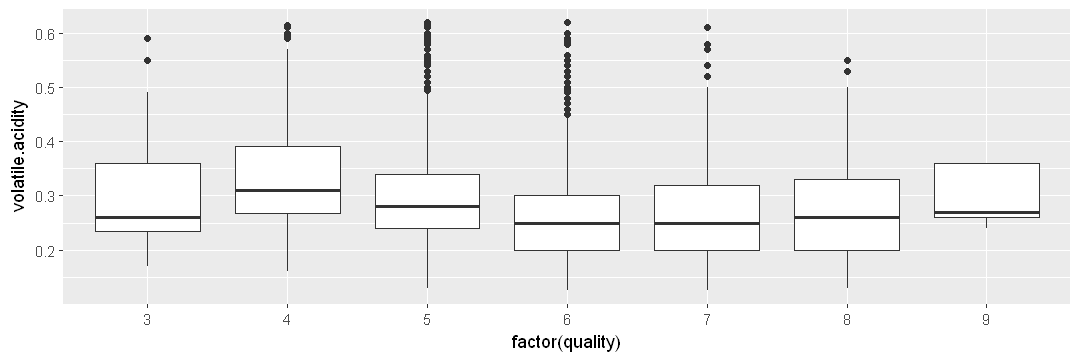

In [37]:
qplot(y=volatile.acidity,x=factor(quality),
      data=subset(ww,
        volatile.acidity<quantile(ww$volatile.acidity,0.99) & 
            volatile.acidity>quantile(ww$volatile.acidity,0.01)), geom="boxplot")

In [38]:
with(subset(ww,
        volatile.acidity<quantile(ww$volatile.acidity,0.99) & 
            volatile.acidity>quantile(ww$volatile.acidity,0.01)),
     cor.test(volatile.acidity,quality))


	Pearson's product-moment correlation

data:  volatile.acidity and quality
t = -11.36, df = 4778, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1896410 -0.1344307
sample estimates:
       cor 
-0.1621628 


> **Correlation test shows that there is a correlation between [-0.19, -0.13] for these variables in a confidence level of 95%.**

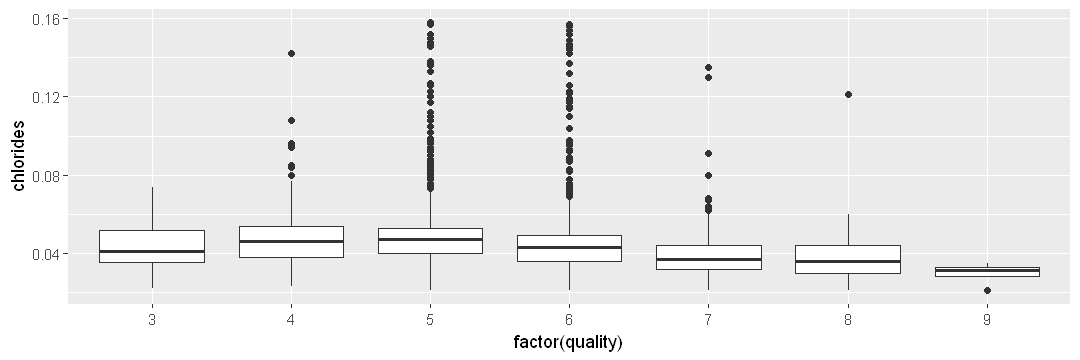

In [39]:
qplot(y=chlorides,x=factor(quality),
      data=subset(ww,
        chlorides<quantile(ww$chlorides,0.99) & 
            chlorides>quantile(ww$chlorides,0.01)), geom="boxplot")

In [40]:
with(ww,cor.test(chlorides,quality))


	Pearson's product-moment correlation

data:  chlorides and quality
t = -15.024, df = 4896, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2365501 -0.1830039
sample estimates:
       cor 
-0.2099344 


> **Correlation test shows that there is a correlation between [-0.24 -0.18] for these variables in a confidence level of 95%.**

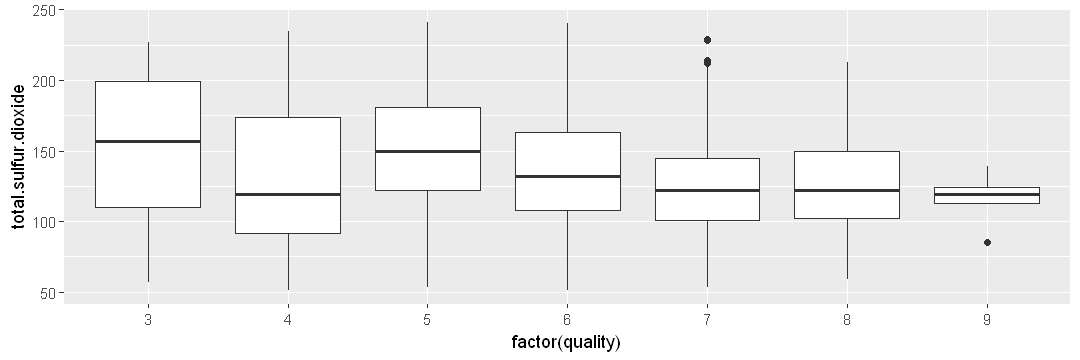

In [41]:
qplot(y=total.sulfur.dioxide,x=factor(quality),
      data=subset(ww,
        total.sulfur.dioxide<quantile(ww$total.sulfur.dioxide,0.99) & 
            total.sulfur.dioxide>quantile(ww$total.sulfur.dioxide,0.01)), geom="boxplot")

In [42]:
with(subset(ww,
        total.sulfur.dioxide<quantile(ww$total.sulfur.dioxide,0.99) & 
            total.sulfur.dioxide>quantile(ww$total.sulfur.dioxide,0.01)),
     cor.test(total.sulfur.dioxide,quality))


	Pearson's product-moment correlation

data:  total.sulfur.dioxide and quality
t = -13.024, df = 4798, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2119747 -0.1573235
sample estimates:
       cor 
-0.1847919 


> **Correlation test shows that there is a correlation between [-0.21, -0.16] for these variables in a confidence level of 95%.**

Let's also look into a summary view with **ggpairs** to see if we miss anything of importance since we so far only looked into corelation between quality and other vairalbes. Other variables could also have correlation between each other.

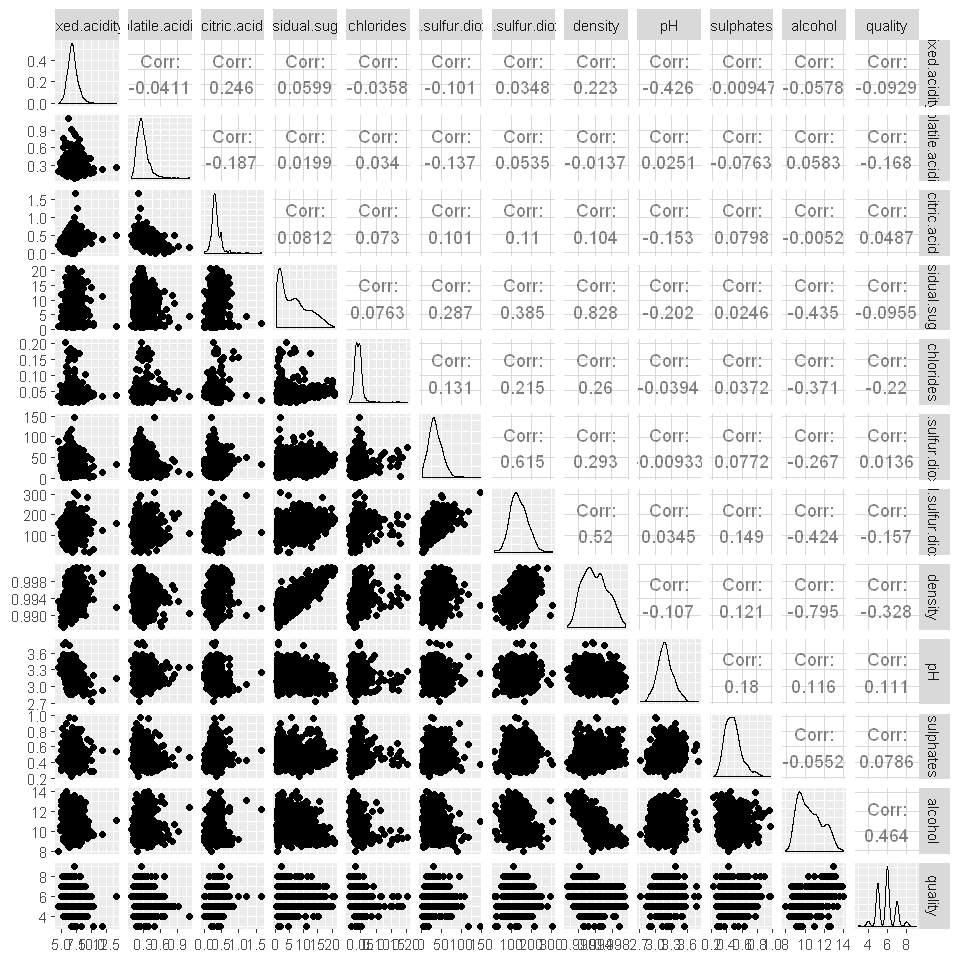

In [43]:
set.seed(1836)
options(repr.plot.width=8, repr.plot.height=8)
ggpairs(ww[sample.int(nrow(ww),1000),])

> The pairs **alcohol - density**(-0.80) and **density - residual.sugar**(0.83) seem to have exceptionally high correlations. 

# Bivariate Analysis

> **Tip**: As before, summarize what you found in your bivariate explorations
here. Use the questions below to guide your discussion.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Our primary variables **alcohol** and **density** have 0.43 and -0.31 correlation with quality respectively. The p-value for both is lower than 2.2e^-16. This means alcohol ratio increases with higher quality of wine. On the other hand, it means density drops when quality increases. Both variables were pointed out in the first part, and it seems our priliminary judgement about these variable sbeing correlated is plausible.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Our secondary variables > **volatile.acidity**, **chlorides**, and **total.sulfur.dioxide** have -0.16, -0.21, and -0.18 correlations with quality respectively. All three variables seem to be decreasing in higher quality wines. Once again, our judgement about these variables seems to be holding. 

### What was the strongest relationship you found?

> The highest correlations seem to between following pairs:

> 1. **alcohol - density**: -0.80
> 2. **density - residual.sugar**: 0.83 

> Both correlations make much sense, since density of alcohol is below water. And amount of solved solid such as sugar increases density.

> However the strongest relationship involving quality is with **alcohol**. (0.43)

# Multivariate Plots Section

> **Tip**: Now it's time to put everything together. Based on what you found in
the bivariate plots section, create a few multivariate plots to investigate
more complex interactions between variables. Make sure that the plots that you
create here are justified by the plots you explored in the previous section. If
you plan on creating any mathematical models, this is the section where you
will do that.

Lest first look into variables that we found have a strong correlation with each other. I would also like to display what qualities they have by applying a colur gradient on data points.

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'gam'


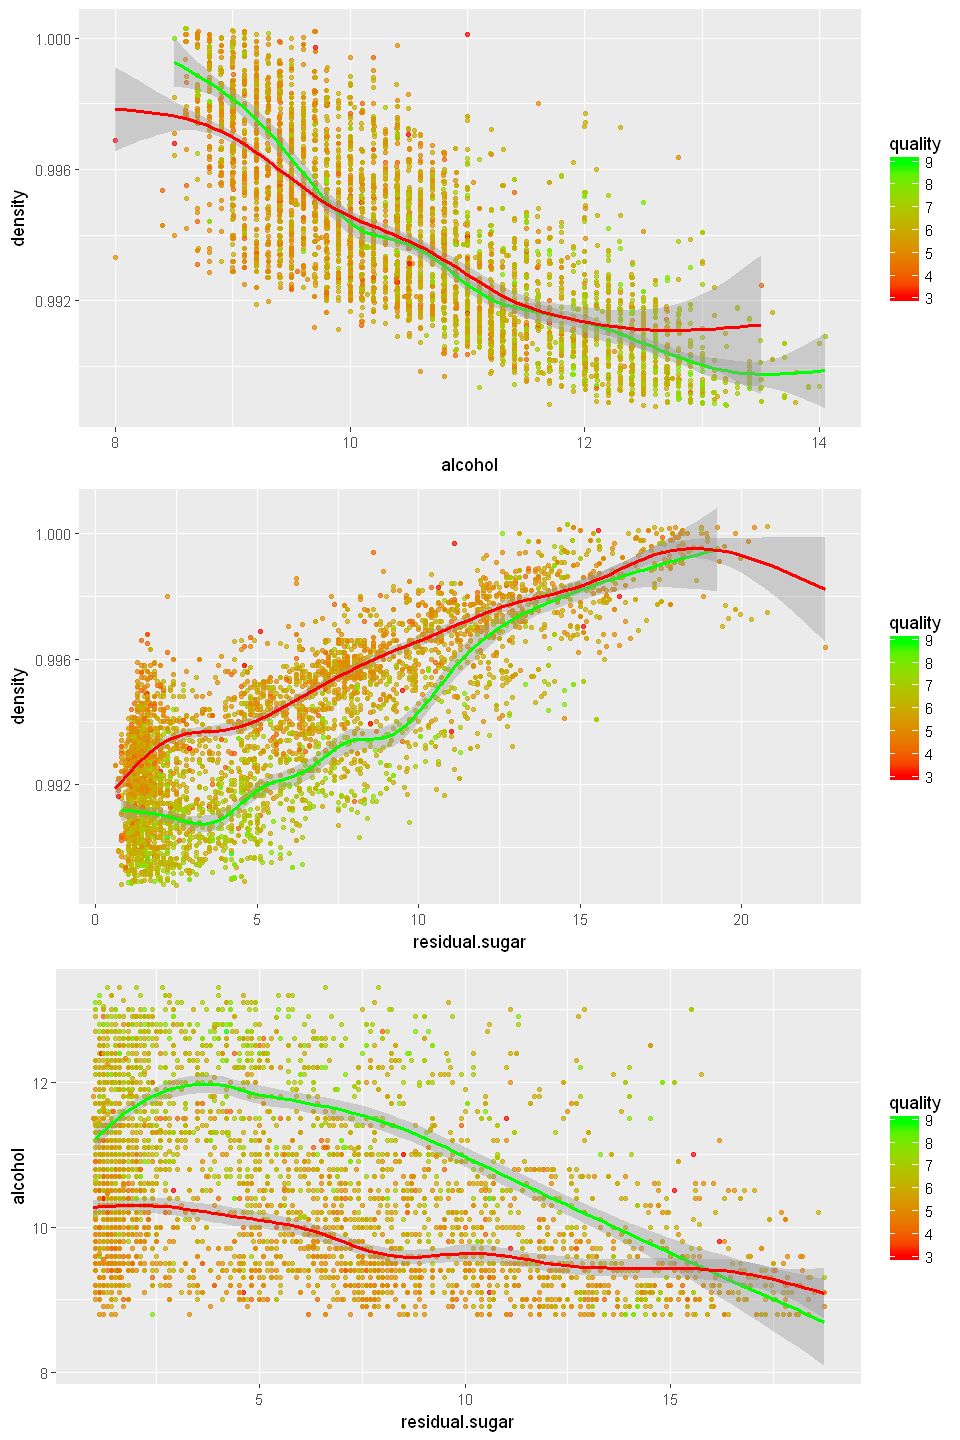

In [197]:
options(repr.plot.width=8, repr.plot.height=12)
data_s <- subset(ww,
    density<quantile(ww$density,0.99) & 
        density>quantile(ww$density,0.01))
g1 <- ggplot(data = data_s, aes(x=alcohol, y=density)) +
  geom_jitter(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") +
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red")

data_s <- subset(ww,
    density<quantile(ww$density,0.99) & 
        density>quantile(ww$density,0.01))
g2 <- ggplot(data = data_s, aes(x=residual.sugar, y=density)) +
  geom_point(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") + 
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red")

data_s <- subset(ww,
    alcohol<quantile(ww$alcohol,0.99) & 
        alcohol>quantile(ww$alcohol,0.01) &
        residual.sugar<quantile(ww$residual.sugar,0.99) & 
        residual.sugar>quantile(ww$residual.sugar,0.01))
g3 <- ggplot(data = data_s, aes(x=residual.sugar, y=alcohol)) +
  geom_point(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") + 
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red")

grid.arrange(g1,g2,g3,ncol=1)

> In **Density - Alcohol** graph we can see that different qualities are actually uniformly distributed in density axes[vertical]. However on alcohol axes[horizontal], we see that the frequency of higher qualities is increasing. We already saw this relationship earlier, so I am not going further into detail.

> In **Density - residual.sugar** graph, ther seems to be a difference of distribution of different qualities in vertical axes[density]. Perhaps, this hints that higher quality wines tends to be of lower density. However this could also be due to alcohol having an effect on density.

> On the hand, there seems to be a relationship with a newgative correlation between **residual.sugar** and **alcohol**. This makes sense, since to have higher degrees of alcohol, most of sugar needs to be converted/fermented into alcohol. The strage thing about all these graphs is the threeway relationship that we will talk later.

To eliminate effect of density on alcohol and vice versa, I will repeat above first two plots by dividing each by the other. 

In [164]:
ww$residual.sugar.normalized <- (ww$residual.sugar-min(ww$residual.sugar))/max(ww$residual.sugar)
ww$alcohol.normalized <- (ww$alcohol - min(ww$alcohol))/max(ww$alcohol)

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


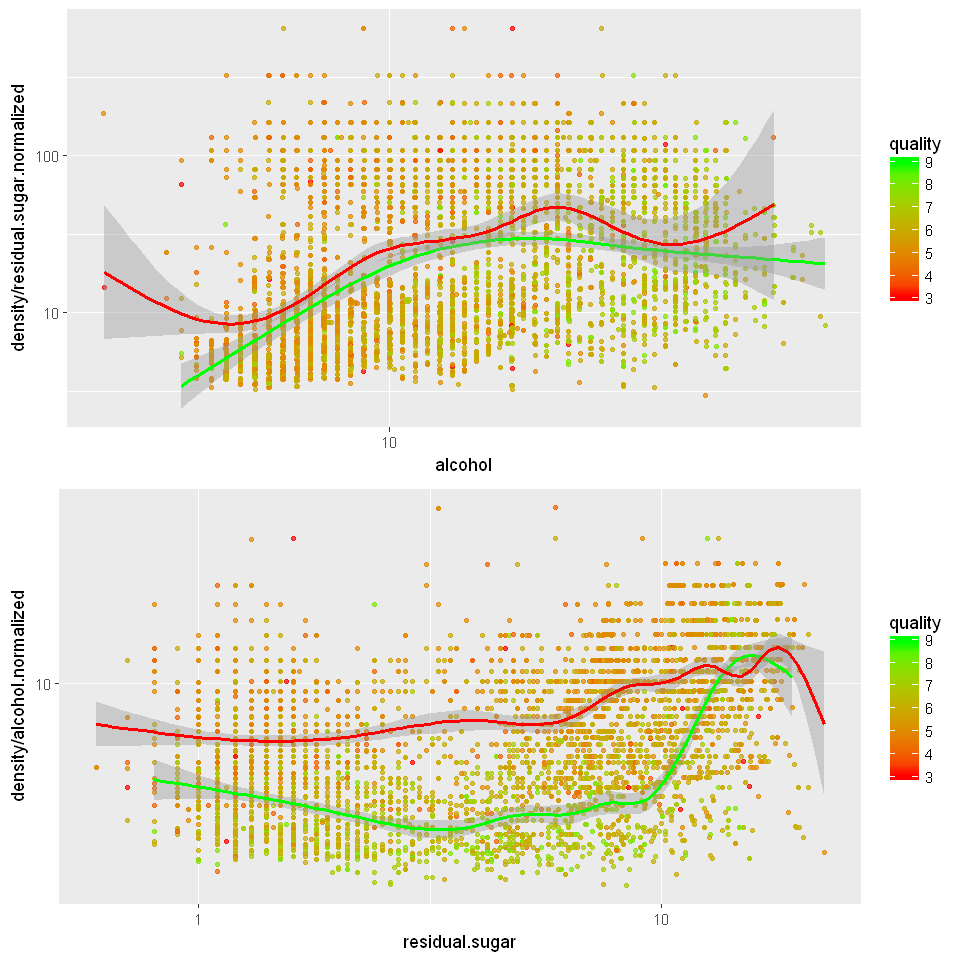

In [186]:
options(repr.plot.width=8, repr.plot.height=8)

data_s <- subset(ww,
    density<quantile(ww$density,0.99) & 
        density>quantile(ww$density,0.01) &
        residual.sugar.normalized != 0)

g1 <- ggplot(data = data_s, aes(x=alcohol, y=density/residual.sugar.normalized)) +
  geom_jitter(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") + 
  scale_y_log10() +
  scale_x_log10() +
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red")

data_s <- subset(ww,
    density<quantile(ww$density,0.99) & 
        density>quantile(ww$density,0.01) &
        alcohol.normalized != 0)
g2 <- ggplot(data = data_s, aes(x=residual.sugar, y=density/alcohol.normalized)) +
  geom_point(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") + 
  scale_y_log10() +
  scale_x_log10() +
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red")

grid.arrange(g1,g2,ncol=1)

> It seems when we removed **residual.sugar** effect from density by dividing density by normalized (0-1) residual sugar values, the relationship with alcohol seems to be still there. Therefore, we can presume that most of *density alcohol* relationship is actually **alcohol** oriented. However, this relationship breaks at the higher the alcohol levels. This hints that sugar effect on density becomes significant at these levels.

> However, the relationship with residual.sugar is moslty lost when we remove alcohol effect the same way. 

From elementary chemistry, we know the realtionship between clorides, pH and acidity. I would like to draw a few plots regarding these variables. In a strange way, however, this process created distinct groups of **density / alcohol.normalized** groups.

In [129]:
summary(ww$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.720   3.090   3.180   3.188   3.280   3.820 

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


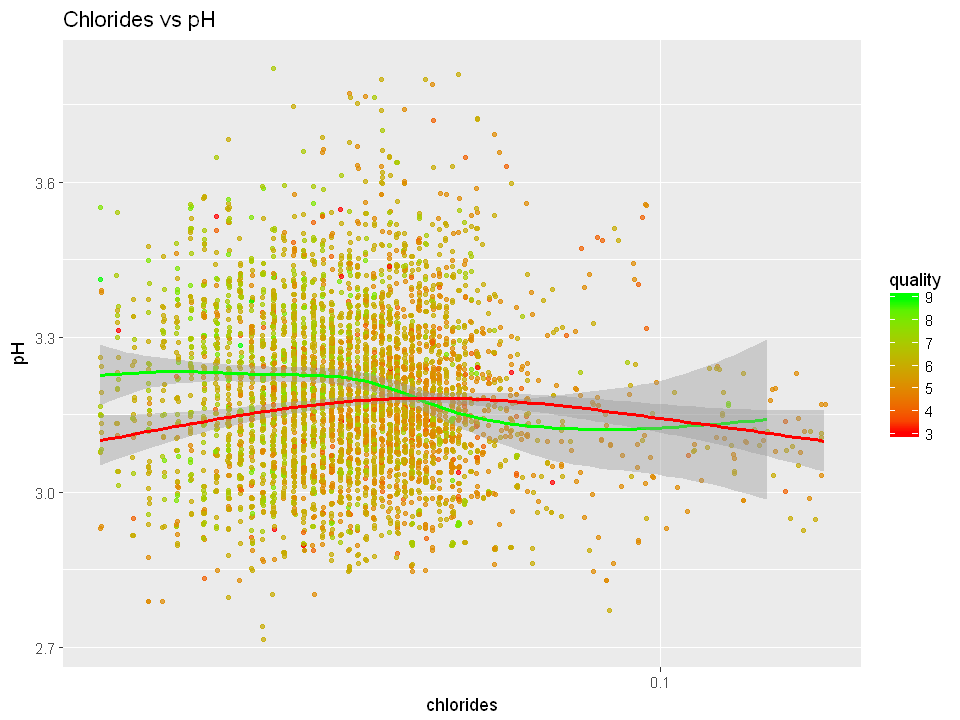

In [185]:
options(repr.plot.width=8, repr.plot.height=6)
data_s <- subset(ww,
    chlorides<quantile(ww$chlorides,0.99) & 
        chlorides>quantile(ww$chlorides,0.01))
ggplot(data = data_s, aes(x=chlorides, y=pH)) +
  geom_jitter(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") + 
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red")  +
  scale_x_log10() +
  labs(title="Chlorides vs pH")

In [133]:
with(ww,cor.test(pH,chlorides))


	Pearson's product-moment correlation

data:  pH and chlorides
t = -6.3542, df = 4896, p-value = 2.285e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.11814666 -0.06259154
sample estimates:
        cor 
-0.09043946 


> I am actually surprized that higher pH(lower acidity) does not correlate to higher amount of chlorides, as I would expect. Therefore, I would like to look into chlorides by eliminating effect of acids on pH.

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


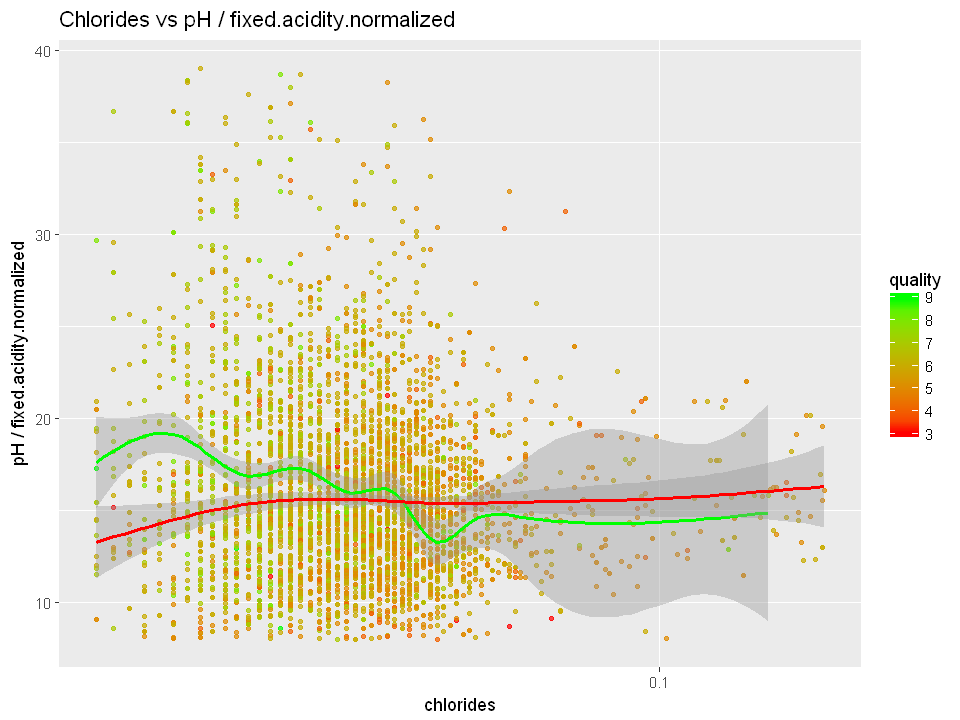

In [192]:
ww$fixed.acidity.normalized <- (ww$fixed.acidity-min(ww$fixed.acidity))/max(ww$fixed.acidity)
ww$pH_fixed.acidity.normalized <- ww$pH / ww$fixed.acidity.normalized
options(repr.plot.width=8, repr.plot.height=6)
data_s <- subset(ww,
    pH_fixed.acidity.normalized<quantile(ww$pH_fixed.acidity.normalized,0.99) & 
        pH_fixed.acidity.normalized>quantile(ww$pH_fixed.acidity.normalized,0.01) &
        chlorides<quantile(ww$chlorides,0.99) &
        chlorides>quantile(ww$chlorides,0.01))
ggplot(data = data_s, aes(x=chlorides, y=pH_fixed.acidity.normalized)) +
  geom_point(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") +
  geom_smooth(data=subset(data_s,quality>6),colour="green",show.legend=TRUE) +
  geom_smooth(data=subset(data_s,quality<6),colour="red",show.legend=TRUE)  +
  scale_x_log10() +
  labs(title="Chlorides vs pH / fixed.acidity.normalized", y = "pH / fixed.acidity.normalized")

This graph shows no significant difference to the original graph. Therefore, we can conclude that removing acidity has no effect on chloride - quality relationship. 

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


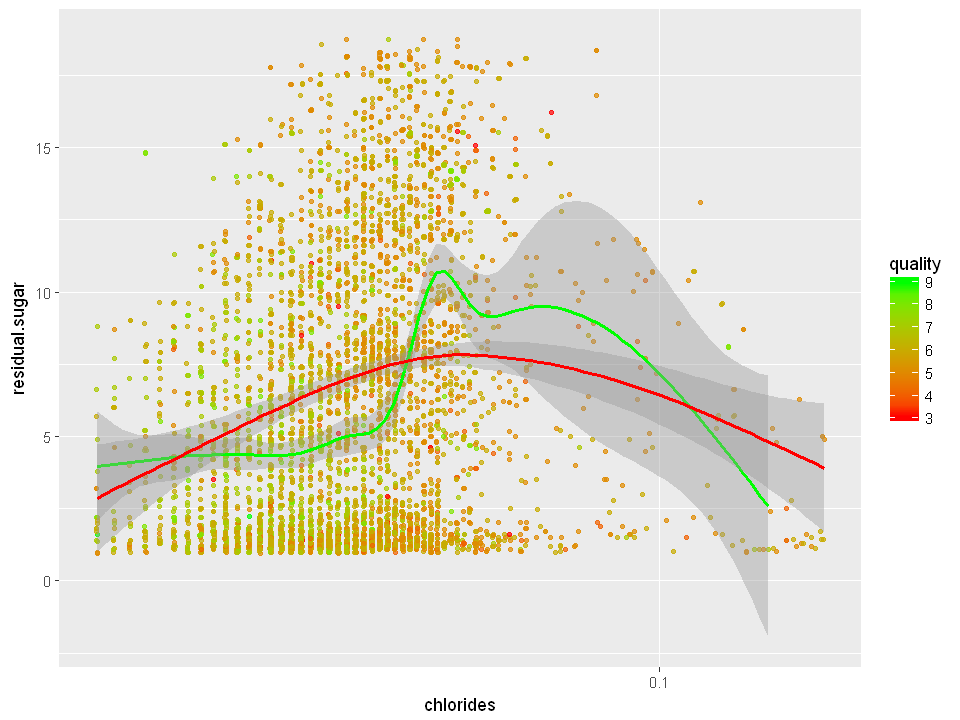

In [199]:
options(repr.plot.width=8, repr.plot.height=6)
data_s <- subset(ww,
    chlorides<quantile(ww$chlorides,0.99) & 
        chlorides>quantile(ww$chlorides,0.01) & 
        residual.sugar<quantile(ww$residual.sugar,0.99) & 
        residual.sugar>quantile(ww$residual.sugar,0.01))
ggplot(data = data_s, aes(x=chlorides, y=residual.sugar)) +
  geom_jitter(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") +
  scale_x_log10() +
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red") 

> Above graph shows scatter plot for **residual.sugar** vs. **chlorides**. Unlike bad quality [3,6) wines, the good quality (6,9] wines tend to have low levels of residual.sugar until it reaches a certain level of **chlorides**. Clorides being salt ingredient is possibly compensated with added sugars.

# Multivariate Analysis

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is strong relationship between density / residual.sugar and density / alcohol. However, this relationship is threeway. Meaning, there is also a relationship between residual.sugar and alcohol, which makes the situation all more harder to understand. By eliminating each of variables, I ve came to the conclusion that, that the core variable that lead the other two is alcohol. Alcohol decreases density much more than sugar increases it. On the other hand, sugar levels are lower in higher alcohol concentration wines. This does also makes sense as the better wine is fermented, the lesser non-fermented sugar we would find.

### Were there any interesting or surprising interactions between features?
> The threeway interaction between **residual.sugar**, **alcohol**, and **density** was interesting. The most surprising re3altionship I found was the one between **clorides** and **pH**. I was really expecting to find more chlorides with higher pH wines. This is because, as pH level nears to the neutral point 7-pH it is expected to find more chlorides than alcalines/acids. 


### OPTIONAL: Did you create any models with your dataset? Discuss the strengths and limitations of your model.

> I was not able to find and strong relationship involving quality. Therefore, I don't think it would make much sense to extract a model for this variable. 

------

# Final Plots and Summary

> **Tip**: You've done a lot of exploration and have built up an understanding
of the structure of and relationships between the variables in your dataset.
Here, you will select three plots from all of your previous exploration to
present here as a summary of some of your most interesting findings. Make sure
that you have refined your selected plots for good titling, axis labels (with
units), and good aesthetic choices (e.g. color, transparency). After each plot,
make sure you justify why you chose each plot by describing what it shows.

### Plot One

### Description One


### Plot Two

### Description Two


### Plot Three

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


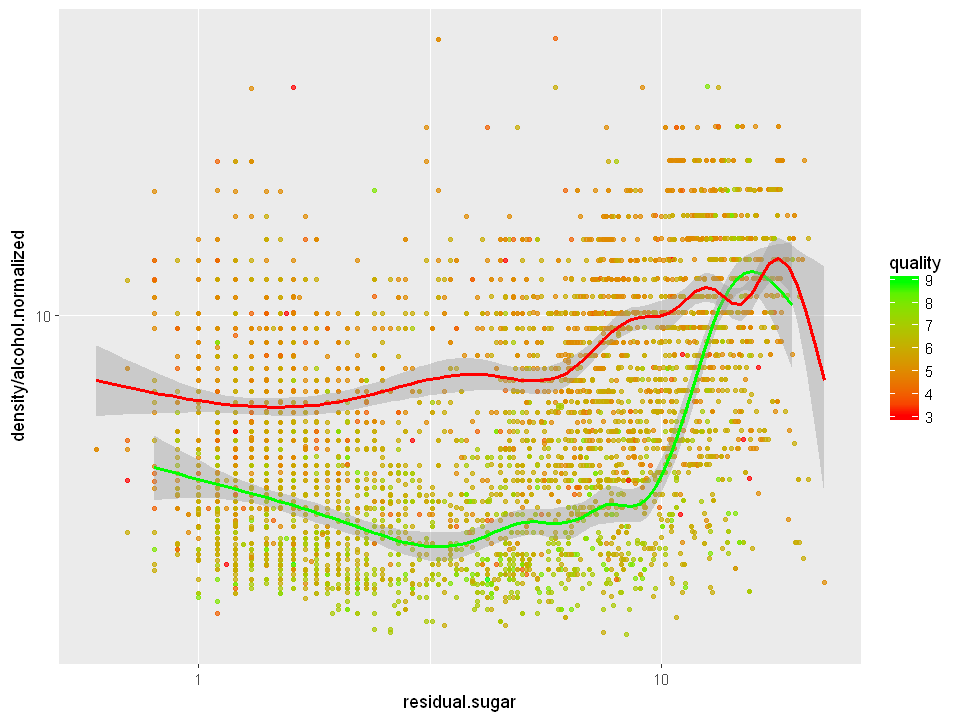

In [200]:
data_s <- subset(ww,
    density<quantile(ww$density,0.99) & 
        density>quantile(ww$density,0.01) &
        alcohol.normalized != 0)
ggplot(data = data_s, aes(x=residual.sugar, y=density/alcohol.normalized)) +
  geom_point(aes(color=quality),size=1,alpha=0.7) + 
  scale_colour_gradient(low = "red", high = "green") + 
  scale_y_log10() +
  scale_x_log10() +
  geom_smooth(data=subset(data_s,quality>6),colour="green") +
  geom_smooth(data=subset(data_s,quality<6),colour="red")

### Description Three

------

# Reflection

> **Tip**: Here's the final step! Reflect on the exploration you performed and
the insights you found. What were some of the struggles that you went through?
What went well? What was surprising? Make sure you include an insight into
future work that could be done with the dataset.

> **Tip**: Don't forget to remove this, and the other **Tip** sections before
saving your final work and knitting the final report!